In [1]:
%matplotlib inline
from comparison import *
from IPython.display import Image
from gensim.models import KeyedVectors
from scipy.spatial.distance import cosine

### K-mer generation

In [2]:
k = generate_kmers(100, [4,5,6,7,8])

### Needleman-Wunsch distance

In [3]:
d = get_distances(k, nw_distance)

### dna2vec distance

In [4]:
fp = "~/Downloads/soft/dna2vec/pretrained/dna2vec-20161219-0153-k3to8-100d-10c-29320Mbp-sliding-Xat.w2v"
mk_model = KeyedVectors.load_word2vec_format(fp, binary=False)
vectors = [mk_model[a] for a in k]

To compute your distance, write a function that returns it and feed into get_distances. Then use compare_spearman to compute Spearman's rho and p-values.

In [5]:
d2v = get_distances(vectors, lambda a,b: 1 - cosine(a,b))

In [6]:
compute_spearman(d,d2v)

(0.4041517686772163, 6.849879158184348e-194)

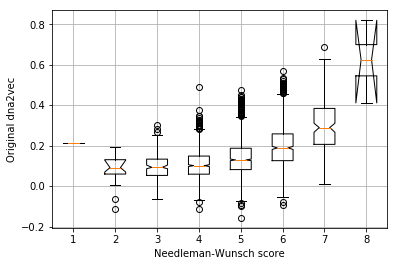

In [7]:
boxplot_of_distances(d, d2v, "Original dna2vec")